In [1]:
cd /mnt/beegfs/scratch/data/S82_standards/

/mnt/beegfs/scratch/data/S82_standards


In [2]:
ls outputs/

In [1]:
%matplotlib inline

import hipscat
import hipscat_import
import pandas as pd
import multiprocessing as mp
import glob
from tqdm import tqdm
import os.path
import numpy as np
import healpy as hp
import glob

import lsdb

pd.set_option('display.max_columns', None)

In [4]:
ls outputs/

In [5]:
bandCols=['Nobs', 'mmed', 'mmu', 'msig', 'mrms', 'mchi2']
s82 = pd.read_table("stripe82calibStars_v4.2.dat",header=None, comment='#', sep=r"\s+", names=['CALIBSTARS','ra', 'dec', 'RArms', 'Decrms','Ntot','Ar']+
                                                                          ['u'+c for c in bandCols]+
                                                                          ['g'+c for c in bandCols]+
                                                                          ['r'+c for c in bandCols]+
                                                                          ['i'+c for c in bandCols]+
                                                                          ['z'+c for c in bandCols])

In [6]:
s82

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,ummed,ummu,umsig,umrms,umchi2,gNobs,gmmed,gmmu,gmsig,gmrms,gmchi2,rNobs,rmmed,rmmu,rmsig,rmrms,rmchi2,iNobs,immed,immu,imsig,imrms,imchi2,zNobs,zmmed,zmmu,zmsig,zmrms,zmchi2
0,CALIBSTARS_0000001,308.500219,-1.227713,0.0227,0.0227,7,0.587,3,23.870,23.823,0.611,0.060,0.056,6,22.388,22.269,0.050,0.154,1.554,7,20.832,20.834,0.017,0.056,1.050,7,20.168,20.202,0.015,0.046,1.105,7,19.900,19.818,0.040,0.116,1.212
1,CALIBSTARS_0000002,308.500072,-1.240266,0.0141,0.0141,7,0.596,4,21.970,21.966,0.093,0.045,0.225,7,20.488,20.462,0.014,0.042,1.116,7,19.763,19.768,0.011,0.052,0.299,7,19.532,19.504,0.013,0.032,0.808,7,19.439,19.386,0.034,0.095,0.824
2,CALIBSTARS_0000003,308.500101,-1.217158,0.0154,0.0154,7,0.579,7,19.394,19.385,0.012,0.021,0.625,6,17.977,17.977,0.005,0.008,0.566,7,17.318,17.317,0.004,0.008,0.889,7,17.052,17.050,0.005,0.027,1.752,6,16.873,16.874,0.007,0.004,0.215
3,CALIBSTARS_0000004,308.501912,-1.176494,0.0117,0.0117,7,0.559,7,20.605,20.598,0.028,0.081,0.852,6,18.457,18.459,0.006,0.007,0.428,7,17.549,17.556,0.005,0.022,0.797,6,17.198,17.188,0.006,0.007,0.496,7,16.968,16.966,0.009,0.022,0.653
4,CALIBSTARS_0000005,308.504615,-1.174191,0.0400,0.0400,7,0.556,2,23.955,23.985,0.634,0.103,0.114,5,23.084,23.022,0.097,0.133,0.542,7,21.299,21.326,0.025,0.060,0.992,7,20.347,20.331,0.016,0.061,1.381,7,19.861,19.747,0.036,0.168,1.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991467,CALIBSTARS_0991468,59.950044,0.973698,0.0436,0.0436,16,0.917,4,24.245,24.252,0.434,0.056,0.061,16,22.535,22.531,0.032,0.117,0.823,15,21.011,21.003,0.013,0.023,0.424,16,20.279,20.273,0.011,0.031,0.649,16,19.832,19.829,0.026,0.094,0.788
991468,CALIBSTARS_0991469,59.068719,-0.701496,0.0245,0.0245,18,1.245,18,20.472,20.466,0.016,0.113,1.315,18,18.229,18.229,0.006,0.014,0.263,15,17.091,17.091,0.005,0.008,0.256,17,16.607,16.607,0.004,0.011,0.559,18,16.302,16.301,0.004,0.020,0.758
991469,CALIBSTARS_0991470,59.940965,0.068224,0.0211,0.0211,13,1.158,12,19.657,19.660,0.025,0.071,0.694,12,17.791,17.788,0.022,0.010,0.136,13,16.868,16.872,0.021,0.009,0.098,11,16.451,16.453,0.024,0.004,0.039,12,16.227,16.236,0.020,0.020,0.250
991470,CALIBSTARS_0991471,59.111628,0.753080,0.0899,0.0899,26,0.860,9,24.570,24.547,0.278,0.108,0.119,17,23.277,23.316,0.058,0.205,0.713,26,21.575,21.542,0.016,0.093,0.990,26,20.198,20.191,0.008,0.046,1.214,25,19.415,19.417,0.013,0.045,0.668


In [7]:
%%time
catalog = lsdb.from_dataframe(s82, catalog_name="S82", drop_empty_siblings=True, highest_order=6)

CPU times: user 45.4 s, sys: 517 ms, total: 45.9 s
Wall time: 45.9 s


In [8]:
catalog.compute()

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,ummed,ummu,umsig,umrms,umchi2,gNobs,gmmed,gmmu,gmsig,gmrms,gmchi2,rNobs,rmmed,rmmu,rmsig,rmrms,rmchi2,iNobs,immed,immu,imsig,imrms,imchi2,zNobs,zmmed,zmmu,zmsig,zmrms,zmchi2,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
715281479499776,CALIBSTARS_0891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.71,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0
715101011181568,CALIBSTARS_0891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.47,18.469,0.005,0.028,1.098,24,17.38,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.81,0.003,0.009,0.627,24,16.748,16.75,0.004,0.011,0.611,4,0,0
714770441306112,CALIBSTARS_0891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.15,0.342,24,20.266,20.267,0.006,0.022,0.76,23,18.816,18.814,0.004,0.009,0.45,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0
712559007105024,CALIBSTARS_0891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.09,0.76,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.03,19.033,0.004,0.017,0.784,24,18.919,18.924,0.01,0.036,0.787,4,0,0
713770364043264,CALIBSTARS_0891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.13,25,17.74,17.738,0.004,0.021,0.949,25,17.089,17.09,0.003,0.011,0.764,24,16.85,16.848,0.003,0.016,1.029,23,16.731,16.73,0.004,0.014,0.744,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13834351349564702720,CALIBSTARS_0218913,316.124689,-0.984808,0.0322,0.0322,16,0.175,12,21.903,21.876,0.058,0.182,0.693,14,21.165,21.165,0.013,0.032,0.688,15,20.899,20.895,0.013,0.036,0.57,16,20.793,20.768,0.017,0.051,0.701,10,20.744,20.665,0.066,0.158,0.791,4,0,3071
13834353321231515648,CALIBSTARS_0218915,316.057052,-0.95856,0.0349,0.0349,15,0.185,9,22.975,22.955,0.138,0.163,0.371,15,21.535,21.545,0.017,0.071,0.908,14,21.02,21.002,0.015,0.055,1.019,15,20.82,20.774,0.017,0.068,1.157,13,20.602,20.582,0.054,0.096,0.502,4,0,3071
13834351427796860928,CALIBSTARS_0218917,316.133306,-0.971373,0.041,0.041,16,0.174,3,24.789,24.878,0.611,0.09,0.095,13,22.356,22.341,0.034,0.075,0.577,16,21.081,21.081,0.015,0.061,0.923,16,20.525,20.51,0.013,0.057,1.156,13,20.048,20.061,0.034,0.2,1.482,4,0,3071


In [9]:
type(catalog)

lsdb.catalog.catalog.Catalog

In [10]:
rm -rf S82_hipscat/

In [11]:
catalog.to_hipscat("S82_hipscat", overwrite=True)

In [12]:
!du -sh S82_hipscat/*

512	S82_hipscat/catalog_info.json
16K	S82_hipscat/_common_metadata
54K	S82_hipscat/_metadata
49M	S82_hipscat/Norder=0
6.8M	S82_hipscat/Norder=2
12M	S82_hipscat/Norder=3
4.5M	S82_hipscat/Norder=4
512	S82_hipscat/partition_info.csv
1.0K	S82_hipscat/provenance_info.json


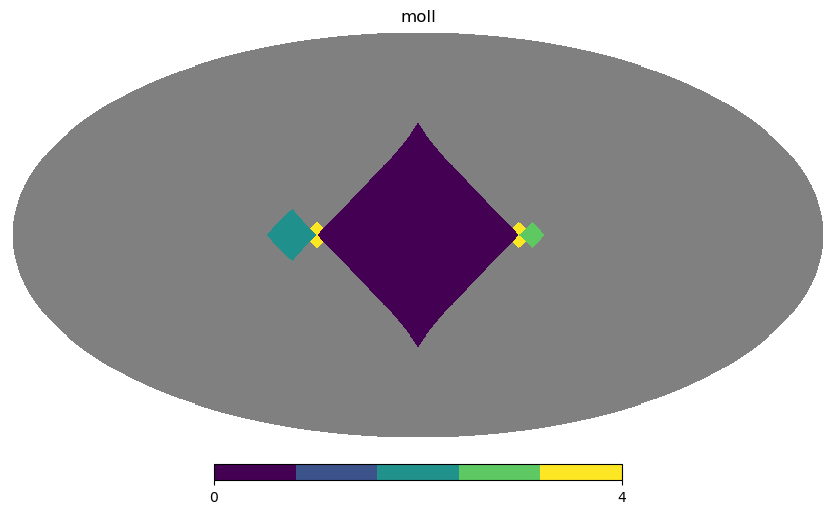

In [13]:
catalog.plot_pixels()

In [18]:
catalog.compute()

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,ummed,ummu,umsig,umrms,umchi2,gNobs,gmmed,gmmu,gmsig,gmrms,gmchi2,rNobs,rmmed,rmmu,rmsig,rmrms,rmchi2,iNobs,immed,immu,imsig,imrms,imchi2,zNobs,zmmed,zmmu,zmsig,zmrms,zmchi2,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
715281479499776,CALIBSTARS_0891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.71,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0
715101011181568,CALIBSTARS_0891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.47,18.469,0.005,0.028,1.098,24,17.38,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.81,0.003,0.009,0.627,24,16.748,16.75,0.004,0.011,0.611,4,0,0
714770441306112,CALIBSTARS_0891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.15,0.342,24,20.266,20.267,0.006,0.022,0.76,23,18.816,18.814,0.004,0.009,0.45,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0
712559007105024,CALIBSTARS_0891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.09,0.76,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.03,19.033,0.004,0.017,0.784,24,18.919,18.924,0.01,0.036,0.787,4,0,0
713770364043264,CALIBSTARS_0891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.13,25,17.74,17.738,0.004,0.021,0.949,25,17.089,17.09,0.003,0.011,0.764,24,16.85,16.848,0.003,0.016,1.029,23,16.731,16.73,0.004,0.014,0.744,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13834351349564702720,CALIBSTARS_0218913,316.124689,-0.984808,0.0322,0.0322,16,0.175,12,21.903,21.876,0.058,0.182,0.693,14,21.165,21.165,0.013,0.032,0.688,15,20.899,20.895,0.013,0.036,0.57,16,20.793,20.768,0.017,0.051,0.701,10,20.744,20.665,0.066,0.158,0.791,4,0,3071
13834353321231515648,CALIBSTARS_0218915,316.057052,-0.95856,0.0349,0.0349,15,0.185,9,22.975,22.955,0.138,0.163,0.371,15,21.535,21.545,0.017,0.071,0.908,14,21.02,21.002,0.015,0.055,1.019,15,20.82,20.774,0.017,0.068,1.157,13,20.602,20.582,0.054,0.096,0.502,4,0,3071
13834351427796860928,CALIBSTARS_0218917,316.133306,-0.971373,0.041,0.041,16,0.174,3,24.789,24.878,0.611,0.09,0.095,13,22.356,22.341,0.034,0.075,0.577,16,21.081,21.081,0.015,0.061,0.923,16,20.525,20.51,0.013,0.057,1.156,13,20.048,20.061,0.034,0.2,1.482,4,0,3071


In [19]:
%%time
catalog6 = lsdb.from_dataframe(s82, catalog_name="S82", drop_empty_siblings=True, lowest_order=6)

CPU times: user 9min 39s, sys: 1.3 s, total: 9min 40s
Wall time: 9min 40s


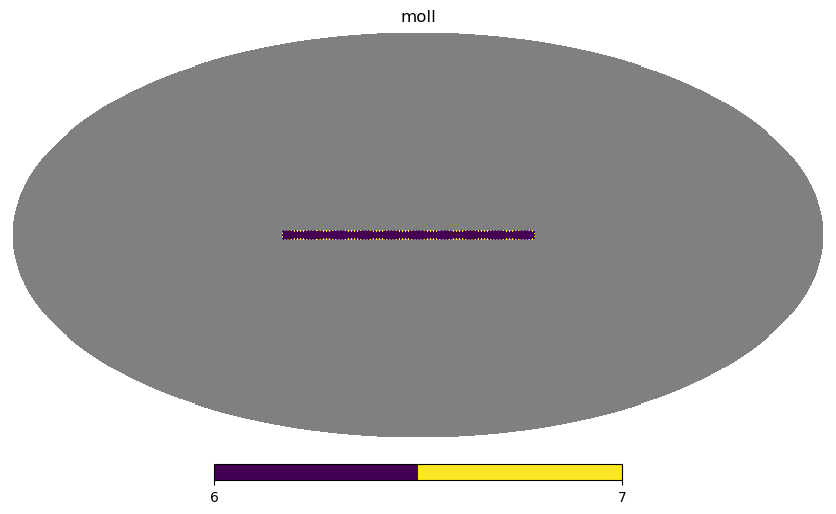

In [20]:
catalog6.plot_pixels()

In [21]:
%%time
catalog6 = lsdb.from_dataframe(s82, catalog_name="S82", drop_empty_siblings=True, lowest_order=6, highest_order=6)

CPU times: user 12min 27s, sys: 1.83 s, total: 12min 29s
Wall time: 12min 29s


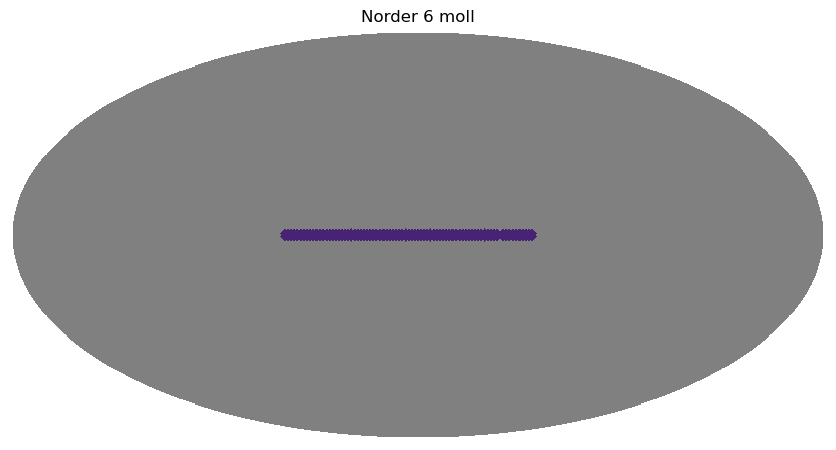

In [22]:
catalog6.plot_pixels()

In [ ]:
catalog6.compute()

In [14]:
lsdb.from_dataframe?

Signature:
lsdb.from_dataframe(
    dataframe: 'pd.DataFrame',
    *,
    lowest_order: 'int' = 0,
    highest_order: 'int' = 7,
    drop_empty_siblings: 'bool' = False,
    partition_size: 'int | None' = None,
    threshold: 'int | None' = None,
    margin_order: 'int | None' = -1,
    margin_threshold: 'float | None' = 5.0,
    should_generate_moc: 'bool' = True,
    moc_max_order: 'int' = 10,
    use_pyarrow_types: 'bool' = True,
    schema: 'pa.Schema | None' = None,
    **kwargs,
) -> 'Catalog'
Docstring:
Load a catalog from a Pandas Dataframe in CSV format.

Note that this is only suitable for small datasets (< 1million rows and
< 1GB dataframe in-memory). If you need to deal with large datasets, consider
using the hipscat-import package: https://hipscat-import.readthedocs.io/

Args:
    dataframe (pd.Dataframe): The catalog Pandas Dataframe.
    lowest_order (int): The lowest partition order. Defaults to 0.
    highest_order (int): The highest partition order. Defaults to 7.
   